# Cluster Analysis

    Basic K-Means model that group countries based on location (lat, long) and Language

### Import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load the data 

In [2]:
data = pd.read_csv('data/Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### plot the data

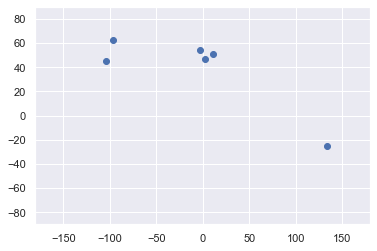

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

### Select the features

In [4]:
x = data.iloc[:, 1:-1]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering 

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [8]:
data_with_cluster = data.copy()
data_with_cluster['cluster'] = identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


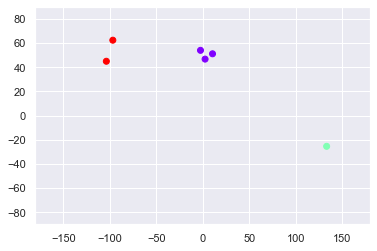

In [9]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

## Let's rebuild the clustering model with the categorical features "Language"

### Map the data

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [20]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [25]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [26]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [27]:
data_with_clusters = data_mapped.copy()
data_with_clusters['clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


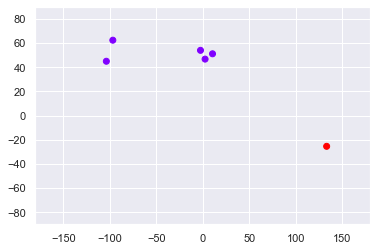

In [28]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### Selecting the numbers of clusters


### WCSS

In [29]:
kmeans.inertia_

13208.95812

### Elbow method 

In [32]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'within-cluster Sum of squares')

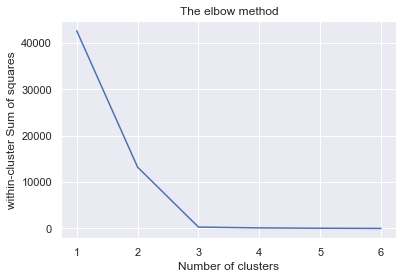

In [36]:
numbers_clusters = np.arange(1,7)
plt.plot(numbers_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster Sum of squares')

The best number of clusters is : k = 3 